In [1]:
import numpy as np
import pickle

# Matricies

This notebook uses many images from the excellent [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/) from [Jay Alammar](https://jalammar.github.io/).

In the first notebook ([vector.ipynb](https://github.com/ADGEfficiency/teaching-monolith/blob/master/numpy/1.vector.ipynb)) we dealt with vectors (one dimensional). 

Now we deal with **Matricies** - arrays with two dimensions.

$\textbf{A}_{2, 2} = \begin{bmatrix}A_{1, 1} & A_{1, 2} \\ A_{2, 1} & A_{2, 2}\end{bmatrix}$

- two dimensional
- uppercase, bold $\textbf{A}_{m, n}$
- $A_{1, 1}$ = first element
- area
- tabular data

## Reshaping

Now that we have multiple dimensions, we need to start considering shape.

We can see the shape using `.shape`

In [14]:
import pandas as pd
pd.DataFrame({
    "Column_1": [1, 2, 3]
}).values

array([[1],
       [2],
       [3]])

In [13]:
import numpy as np
np.array([
    np.array([1, 2, 3]),
    np.array([4, 5, 6])
])

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
data = np.arange(16)
data.shape

(16,)

And the number of elements using `.size`

In [16]:
data.size

16

The **shape** of a matrix becomes more than just an indication of the length.  We can change the shape using reshape:

In [17]:
a = data.reshape(4, 4)

A very useful tool when reshaping is using `-1` - this is a free dimension that will be set to match the size of the data
- this is often set to the batch / number of samples dimension

In [19]:
data.reshape(2, -1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [10]:
data.reshape(-1, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

We can use `.reshape` to flatten

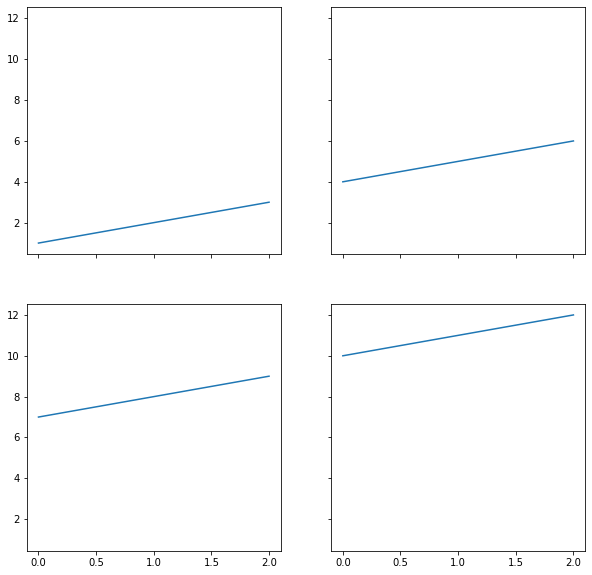

In [36]:
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
]
import matplotlib.pyplot as plt
fig, axs = plt.subplots(
    figsize=(10, 10),
    ncols=2,
    nrows=2,
    sharex=True,
    sharey=True
)
axs = axs.ravel()
for i in range(len(data)):
    axs[i].plot(data[i])

In [11]:
data.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

We can also use `.flatten`

In [12]:
data.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

And finally `.ravel`

In [16]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [41]:
axs.ravel().shape

(4,)

`.flatten` always returns a copy - `.ravel` doesn't (if it can)

Closely related to a reshape is the **transpose**, which flips the array along the diagonal:

<img src="assets/trans.png" alt="" width="300"/>

In [42]:
np.arange(0, 6).reshape(3, -1)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [44]:
np.transpose(np.arange(0, 6).reshape(3, -1))

array([[0, 2, 4],
       [1, 3, 5]])

In [20]:
np.transpose(np.arange(0, 6).reshape(3, -1))

array([[0, 2, 4],
       [1, 3, 5]])

Reshape is (usually) computationally **cheap** - to understand why we need to know a little about how a `np.array` is laid out in memory

## The `np.array` in memory

- the data is stored in a single block
- the shape is stored as a tuple

Why is storing in a single block (known as a contiguous layout) a good thing?
- to access the next value an the array 
- we just move to the next memory address
- length = defined by the data type

> ... storing data in a contiguous block of memory ensures that the architecture of modern CPUs is used optimally, in terms of memory access patterns, CPU cache, and vectorized instructions - [iPython coobook](https://ipython-books.github.io/45-understanding-the-internals-of-numpy-to-avoid-unnecessary-array-copying/)

Changing the shape only means changing the tuple 
- the layout of the data in memory is not changed

The operations that will change the memory layout are ones that change the order of the data - for example a transpose:

## Two dimensional indexing

<img src="assets/idx2.png" alt="" width="500"/>

We specify both dimensions using a familiar `[]` syntax

`:` = entire dimension

`-1` = last element

### Two dimension aggregation

<img src="assets/agg-2d.png" alt="" width="900"/>

Now that we are working in two dimensions, we have more flexibility in how we aggregate
- we can specify the axis (i.e. the dimension) along which we aggregate

In [46]:
data = np.random.rand(2, 3)
print(data)

[[0.3504116  0.55388374 0.89861091]
 [0.63863312 0.71976446 0.58231145]]


In [47]:
np.mean(data, axis=0)

array([0.49452236, 0.6368241 , 0.74046118])

In [48]:
np.mean(data, axis=1)

array([0.60096875, 0.64690301])

By default `numpy` will remove the dimension you are aggregating over:

You can choose to keep this dimension using a `keepdims` argument:

## Practical

Aggregate by variance `np.var` 
- over the rows
- over the columns
- over all data

## Two dimensional broadcasting

The general rule with broadcasting - dimensions are compatible when
- they are equal
- or when one of them is 1

<img src="assets/broad-2d.png" alt="" width="500"/>

## Matrix arithmetic

Can make arrays from nested lists:

We can add matricies of the same shape as expected:

<img src="assets/add-matrix.png" alt="" width="300"/>

## Matrix multiplication

This kind of matrix multiplication will often **change the shape** of the array
- this is what happens in neural networks

<img src="assets/dot1.png" alt="" width="900"/>

This operation can be visualized:

<img src="assets/dot2.png" alt="" width="900"/>

In [49]:
data = np.array([1, 2, 3])

powers_of_ten = np.array([10**n for n in range(6)]).reshape(3, 2)
print(powers_of_ten)

[[     1     10]
 [   100   1000]
 [ 10000 100000]]


This is done in numpy using either `np.dot()`:

In [26]:
data.shape

(3,)

In [27]:
powers_of_ten.shape

(3, 2)

In [56]:
np.array([1, 2, 3])

array([1, 2, 3])

In [50]:
np.dot(data, powers_of_ten)

array([ 30201, 302010])

In [59]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
b = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

np.multiply(a, b)

array([[ 1,  4,  9],
       [16, 25, 36]])

In [51]:

data.dot(powers_of_ten)

array([ 30201, 302010])

In [53]:
powers_of_ten.dot(data)

ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [24]:
np.dot(data, powers_of_ten)
# np.dot(powers_of_ten, data)

array([ 30201, 302010])

Or calling the `.dot()` method on the array itself:

In [25]:
data.dot(powers_of_ten)

array([ 30201, 302010])

## Making arrays from nested lists

In [58]:
np.array([
    [
        1, 2, 3
    ],
    [
        1, 2, 3
    ]
])

array([[1, 2, 3],
       [1, 2, 3]])

## Making arrays from shape tuples

The argument to these functions is a tuple

### `zeros`, `ones`, `full`

In [60]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [61]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [62]:
np.full((2, 4), 34253454)

array([[34253454, 34253454, 34253454, 34253454],
       [34253454, 34253454, 34253454, 34253454]])

In [67]:
np.eye(1)

array([[1.]])

### `zeros_like`, `ones_like`, `full_like`

Similar to counterparts above, except their shape is defined by another array:

In [72]:
test = np.array([
    [4, 2],
    [3, 2]
])
np.full_like(test, 234)

array([[234, 234],
       [234, 234]])

### `empty`

Similar to `zeros`, except the array is filled with garbage from RAM 
- this is a bit quicker than `zeros`

In [76]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [93]:
np.ndarray((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [92]:
np.empty(shape=(2, 1))

array([[2.e-323],
       [1.e-323]])

In [ ]:
def test_func(a: np.array):
    pass

In [ ]:
test_func(
    1
)

### `eye`

Identity matrix :

The linear algebra verision of a 1

# Regression factors
The formula for the regression coefficients is

$\beta = (X'X)^{(-1)}X'Y $

But the data is a bit messed up, meaning that the format of the independent variables are saved in a flat array. That means we have a 1xN vector. I.e. the data was changed from that: 

<img src="assets/data_before.png" alt="" width="500"/>

to that:

<img src="assets/data_after.png" alt="" width="700"/>

The array contains the following variables: 

- Sale (in Dollars) - Amount of money received by the store
- Pack Size - Number of bottles per item
- State Bottle Cost - Cost of producing the bottle 
- Packs Sold - Amount of bottles sold
- Bottle Volume (in ml) - How many ml each bottle has



Question: Determine the regression coefficents of the following OLS regression

$Sale = \beta_0 + \beta_1 * (Pack Size) + \beta_2 * (State Bottle Cost) + \beta_3 * (Packs Sold) + \beta_4 * (Bottle Volume) + \epsilon $

In [1]:
import pickle
import numpy as np
with open("./data/data.pkl", "rb") as f:
    data = pickle.load(f)
print(data)

['162.84' 6 '18.09' ... '7.53' 12 750]


In [2]:
# Getting the data into the right shape
# Getting the data into the right type

reshaped_data = data\
    .reshape(-1, 5)\
    .astype(float)

In [3]:
# Split features and target
y = reshaped_data[:, 0]
features = reshaped_data[:, 1:]

In [4]:
# Add a constant to the features
ones = np.ones(len(features))
ones_w_two_dims = ones[:, np.newaxis]

X = np.concatenate((ones_w_two_dims, features), axis=1)

In [9]:
transpose_x = np.transpose(X)
first_part = np.dot(transpose_x, X)
inv = np.linalg.inv(first_part)

In [14]:
second_part = np.dot(transpose_x, y)
np.dot(inv, second_part)

array([-3.88928013e+01, -4.62402519e+00,  9.48100848e+00,  1.53183949e+01,
       -1.88215965e-02])

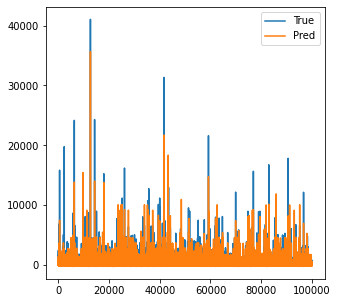

In [28]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X, y)

y_pred = ols.predict(X)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(5, 5))
axs.plot(y, label="True")
axs.plot(y_pred, label="Pred")
axs.legend()
plt.show()

In [17]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 8.835e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:48:48   Log-Likelihood:            -6.6361e+05
No. Observations:              100000   AIC:                         1.327e+06
Df Residuals:                   99995   BIC:                         1.327e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.8928      2.675    -14.537      0.000     -44.137     -33.649
x1            -4.6240      0.104    -44.531      0.000      -4.828      -4.421
x2             9.4810      0.092    102.755      0.000       9.300       9.662
x3            15.3184      0.026    586.137      0.000      15.267      15.370
x4            -0.0188      0.002    -12.034      0.000      -0.022      -0.016
==============================================================================
Omnibus:                   190007.483   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11161884404.416
Skew:                          13.336   Prob(JB):                         0.00
Kurtosis:                    1639.503   Cond. No.                     4.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Answers
You are encouraged to use this upcoming line only for checking purposes

## Cross checking
Here we are cross checking with a statistics package